In [73]:
import os
import pickle
import pydicom
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pydicom.pixel_data_handlers.util import apply_voi_lut
summary_dicom_path = "/media/tungthanhlee/DATA/brain-mri-eda/summary_dicom_1.pkl"
summary_anot_path = "/media/tungthanhlee/DATA/brain-mri-eda/summary_anot.pkl"


In [74]:
df1 = pd.read_pickle(summary_dicom_path)
df2 = pd.read_pickle(summary_anot_path)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_row', None)


In [90]:
# df2 = df2["seriesuid"].value_counts()
path = []
for key,value in enumerate(df2["seriesuid"]):
    path.append(value)
index = 11
chosen_series_uid = path[index]

In [91]:
df1_ex = df1[df1.SeriesInstanceUID == chosen_series_uid].sort_values(by = ["SliceLocation"])

In [92]:
df1_ex.head()

,StudyInstanceUID,SeriesInstanceUID,SeriesDescription,Rows,Columns,SliceThickness,PixelSpacing,SpacingBetweenSlices,SliceLocation,SmallestImagePixelValue,LargestImagePixelValue,WindowCenter,WindowWidth,ImagePositionPatient,ImageOrientationPatient,RepetitionTime,EchoTime,PatientPosition,NameFileDCM
1182,1.2.840.113619.6.388.10811204088024990591589460410450038986,1.2.840.113619.2.388.57473.14165493.12404.1597274161.342,Ax T2 FLAIR,512,512,6,"[0.5078, 0.5078]",7,46.1081,0,1932,966,1932,"[-136.427, -110.076, 29.8449]","[0.990056, -0.063852, 0.125348, 0.0643598, 0.997927, -2.02472e-06]",8155,77.976,HFS,1.2.840.113619.2.388.57473.14165493.11814.1597274273.690.dcm
1183,1.2.840.113619.6.388.10811204088024990591589460410450038986,1.2.840.113619.2.388.57473.14165493.12404.1597274161.342,Ax T2 FLAIR,512,512,6,"[0.5078, 0.5078]",7,53.0529,0,1917,958,1917,"[-137.303, -110.02, 36.7897]","[0.990056, -0.063852, 0.125348, 0.0643599, 0.997927, -2.02472e-06]",8155,77.976,HFS,1.2.840.113619.2.388.57473.14165493.11814.1597274273.691.dcm
1184,1.2.840.113619.6.388.10811204088024990591589460410450038986,1.2.840.113619.2.388.57473.14165493.12404.1597274161.342,Ax T2 FLAIR,512,512,6,"[0.5078, 0.5078]",7,59.9977,0,2118,1059,2118,"[-138.178, -109.963, 43.7345]","[0.990056, -0.063852, 0.125348, 0.0643598, 0.997927, -2.02472e-06]",8155,77.976,HFS,1.2.840.113619.2.388.57473.14165493.11814.1597274273.692.dcm
1185,1.2.840.113619.6.388.10811204088024990591589460410450038986,1.2.840.113619.2.388.57473.14165493.12404.1597274161.342,Ax T2 FLAIR,512,512,6,"[0.5078, 0.5078]",7,66.9425,0,1958,979,1958,"[-139.054, -109.907, 50.6793]","[0.990056, -0.063852, 0.125348, 0.0643599, 0.997927, -1.99538e-06]",8155,77.976,HFS,1.2.840.113619.2.388.57473.14165493.11814.1597274273.693.dcm
1186,1.2.840.113619.6.388.10811204088024990591589460410450038986,1.2.840.113619.2.388.57473.14165493.12404.1597274161.342,Ax T2 FLAIR,512,512,6,"[0.5078, 0.5078]",7,73.8873,0,1937,968,1937,"[-139.93, -109.85, 57.6241]","[0.990056, -0.063852, 0.125348, 0.0643598, 0.997927, -1.99538e-06]",8155,77.976,HFS,1.2.840.113619.2.388.57473.14165493.11814.1597274273.694.dcm


In [93]:
# extract unique z from annotation
points = list(df2[df2.seriesuid == chosen_series_uid]["points"])[0]
z_anot = []
xy3d = []
for point in points:
    z_anot.append(point[2])
z_anot = pd.Series(z_anot).drop_duplicates()
z_anot


0    31.545000
4    42.345001
8    56.744999
dtype: float64

In [94]:
z_meta_slice = [float(value) for key,value in enumerate(df1_ex["SliceLocation"])]


In [95]:
z_meta_imgpose = [float(value[2])  for key,value in enumerate(df1_ex["ImagePositionPatient"])]
z_meta_imgpose = sorted(z_meta_imgpose)

In [96]:
# extract slice contain upper, lower and middle annotation point
match_z = []
for z in z_anot:
    print(z)
    abs_store = []
    abs_store = [[index,np.abs(z - z_new)] for index,z_new in enumerate(z_meta_slice) if np.sign(z) == np.sign(z_new)]
    abs_store =  sorted(abs_store, key=lambda x:x[1])
    match_z.append(abs_store[0])
print(match_z)


31.545000076294
42.345001220703
56.744998931885
[[0, 14.563081743706004], [0, 3.7630805992970053], [2, 3.2526702881149987]]


In [97]:
xyroot = []

In [98]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = pydicom.read_file(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data

In [100]:
study_uid = "1.2.840.113619.6.388.10811204088024990591589460410450038986"
root = "//media/tungthanhlee/DATA/brain-mri-tumor-dicom-masked"
study_folder = os.path.join(root, study_uid)

extracted_path = []
xyroot = []
for i in match_z:
    print(i[0])
    extracted_path.append( os.path.join(study_folder, df1_ex.iloc[i[0]]["NameFileDCM"]))
    xyroot.append(df1_ex.iloc[i[0]]["ImagePositionPatient"])
print(extracted_path)

imgs = []
for i in extracted_path:
    imgs.append(read_xray(i))

0
0
2
['//media/tungthanhlee/DATA/brain-mri-tumor-dicom-masked/1.2.840.113619.6.388.10811204088024990591589460410450038986/1.2.840.113619.2.388.57473.14165493.11814.1597274273.690.dcm', '//media/tungthanhlee/DATA/brain-mri-tumor-dicom-masked/1.2.840.113619.6.388.10811204088024990591589460410450038986/1.2.840.113619.2.388.57473.14165493.11814.1597274273.690.dcm', '//media/tungthanhlee/DATA/brain-mri-tumor-dicom-masked/1.2.840.113619.6.388.10811204088024990591589460410450038986/1.2.840.113619.2.388.57473.14165493.11814.1597274273.692.dcm']


In [101]:
xy3d = [[point[0], point[1]] for point in points]
xy3d

[[-4.5391001701355, 28.402599334717],
 [17.692199707031, 28.402599334717],
 [17.692199707031, 55.909099578857],
 [-4.5391001701355, 55.909099578857],
 [-2.6550900936127, 28.025800704956],
 [25.605100631714, 28.025800704956],
 [25.605100631714, 57.039600372314],
 [-2.6550900936127, 57.039600372314],
 [2.9969499111176, 24.257699966431],
 [32.764301300049, 24.257699966431],
 [32.764301300049, 47.619499206543],
 [2.9969499111176, 47.619499206543]]

In [102]:
pixel_spacing =  float(df1_ex.iloc[0]["PixelSpacing"][0])
# print(pixel_spacing)
slice_thickness =  df1_ex.iloc[0]["SliceThickness"]
# print(slice_thickness)

delta = np.sqrt(2*((pixel_spacing/2)**2))
# print(delta)
# xy_root_new = [[float(p[0]) - delta,float(p[1]) + delta] for p in xyroot]
xy_root_new = [[float(p[0]) ,float(p[1]) ] for p in xyroot]
# print(xy_root_new)

In [103]:
xy2d = []
cur_im = []
count1 = 1
count2 = 0
while count1 <  len(xy3d)+1:

    new_p = [(xy3d[count1-1][0] - xy_root_new[count2][0])/pixel_spacing,
            (xy3d[count1-1][1] - xy_root_new[count2][1])/pixel_spacing]
    # xy2d.append(new_p)
    cur_im.append(new_p)
    print(new_p)

    if count1 % 4 == 0:
        xy2d.append(cur_im)
        cur_im = []
        count2 += 1


    count1 += 1
xy2d

[259.72410364289976, 272.70303137990743]
[303.5037410536254, 272.70303137990743]
[303.5037410536254, 326.8710113801831]
[259.72410364289976, 326.8710113801831]
[263.43424558170005, 271.961009659228]
[319.08645260282395, 271.961009659228]
[319.08645260282395, 329.09728312783375]
[263.43424558170005, 329.09728312783375]
[278.0128986040126, 264.31803853176643]
[336.63312583704015, 264.31803853176643]
[336.63312583704015, 310.3239448730661]
[278.0128986040126, 310.3239448730661]


[[[259.72410364289976, 272.70303137990743],
  [303.5037410536254, 272.70303137990743],
  [303.5037410536254, 326.8710113801831],
  [259.72410364289976, 326.8710113801831]],
 [[263.43424558170005, 271.961009659228],
  [319.08645260282395, 271.961009659228],
  [319.08645260282395, 329.09728312783375],
  [263.43424558170005, 329.09728312783375]],
 [[278.0128986040126, 264.31803853176643],
  [336.63312583704015, 264.31803853176643],
  [336.63312583704015, 310.3239448730661],
  [278.0128986040126, 310.3239448730661]]]

In [104]:
plot_point = []
for cur_im in xy2d:
    x= [ p[0] for p in cur_im]
    print(x)
    y = [ p[1] for p in cur_im ]
    bottomleft = (min(x), min(y))
    height = max(y) - min(y)
    width = max(x) - min(x)
    out = [bottomleft, width, height]
    plot_point.append(out)
plot_point

[259.72410364289976, 303.5037410536254, 303.5037410536254, 259.72410364289976]
[263.43424558170005, 319.08645260282395, 319.08645260282395, 263.43424558170005]
[278.0128986040126, 336.63312583704015, 336.63312583704015, 278.0128986040126]


[[(259.72410364289976, 272.70303137990743),
  43.77963741072563,
  54.16798000027569],
 [(263.43424558170005, 271.961009659228), 55.6522070211239, 57.13627346860574],
 [(278.0128986040126, 264.31803853176643),
  58.62022723302755,
  46.00590634129969]]

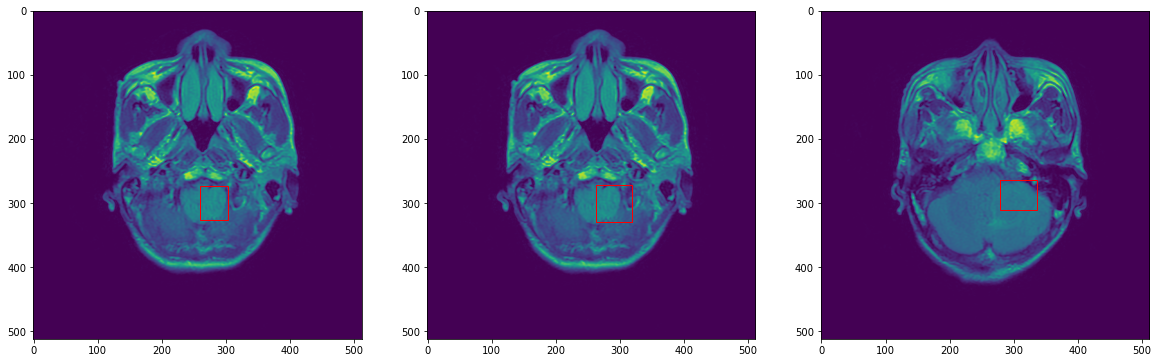

In [105]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(7)
fig.set_figwidth(20)


ax1.imshow(imgs[0])
rect1 = patches.Rectangle(plot_point[0][0], plot_point[0][1], plot_point[0][2], linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect1)
ax2.imshow(imgs[1])
rect2 = patches.Rectangle(plot_point[1][0], plot_point[1][1], plot_point[1][2], linewidth=1, edgecolor='r', facecolor='none')
ax2.add_patch(rect2)
ax3.imshow(imgs[2])
rect3 = patches.Rectangle(plot_point[2][0], plot_point[2][1], plot_point[2][2], linewidth=1, edgecolor='r', facecolor='none')
ax3.add_patch(rect3)
fig.savefig("check.jpg")